# AudioSet + RMS + as-Speech models
Single predictor models using AudioSet regressors + RMS + Speech

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from tools.create import create_single_models
from tools.base import (dump_collection, load_collection, 
                        flatten_collection, compute_metrics,
                        _extract_regressors)
from tools.viz import (plot_regressor, plot_regressor,
                       plot_metrics, plot_contrast_by_dataset, plot_contrast_by_analysis,
                       plot_analysis_grid)
from pyns import Neuroscout
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
%matplotlib inline

In [11]:
api = Neuroscout()

## Define predictors and confounds

In [12]:
predictors = ["as-Animal", "as-Music", "as-Whistling", "as-Vehicle", "as-Silence", "as-Tools", "as-Noise", "as-Water", "as-Wind", "as-Hands", "as-Wood"]
control = ["rms", "as-Speech"]

In [13]:
confounds = ['a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 'a_comp_cor_05',  'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']

In [14]:
transformations = [{"Name": "Scale", 
                    "Demean": True, 
                    "Rescale": True,
                    "ReplaceNA": "after", 
                    "Input": ["rms"]}]

## Create models

In [6]:
single_models = create_single_models(predictors, confounds, control=control, transformations=transformations)

In [15]:
filename = Path('models') / 'audioset_rms_speech.json'

In [19]:
dump_collection(single_models, filename)

In [16]:
single_models = load_collection(filename)

### Reports

In [20]:
for (pred, dataset, task), model in flatten_collection(single_models):
    model.generate_report(run_id=model.runs[0])

In [21]:
for p in predictors:
    single_models[p]['LearningTemporalStructure']['movie'].plot_report()

## Inspect regressors

In [11]:
df = _extract_regressors(single_models, datasets=['Budapest'])

In [ ]:
plot_regressor('distribution', df=df, split_by='hue', color=None, aspect=3, hist=None, rug=True)

In [ ]:
plot_regressor('timeseries', df=df, split_by='row', height=1.2, aspect=10)

In [14]:
agg_df = compute_metrics(df=df, aggfunc=[np.mean, np.std, np.var])

In [ ]:
plot_metrics(agg_df, metrics=['mean', 'std', 'var'],
             sns_function='barplot', height=3, aspect=1)

## Compile models

In [31]:
for (pred, dataset, task), model in flatten_collection(single_models):
    if model.get_status()['status'] == 'DRAFT':
        model.private = False
        model.push()
        model.compile()
    else:
        print(f'Status: {model.status} for {pred}, {dataset}, {task}')

Status: PASSED for as-Animal, Budapest, movie
Status: PASSED for as-Animal, HealthyBrainNetwork, movieDM
Status: PASSED for as-Animal, LearningTemporalStructure, movie
Status: PASSED for as-Animal, Life, life
Status: PASSED for as-Animal, ParanoiaStory, story
Status: PASSED for as-Animal, Raiders, raiders
Status: PASSED for as-Animal, SchematicNarrative, perception
Status: PASSED for as-Animal, Sherlock, sherlockPart1
Status: PASSED for as-Animal, SherlockMerlin, MerlinMovie
Status: PASSED for as-Animal, SherlockMerlin, SherlockMovie
Status: PASSED for as-Animal, studyforrest, movie
Status: PASSED for as-Hands, Budapest, movie
Status: PASSED for as-Hands, HealthyBrainNetwork, movieDM
Status: PASSED for as-Hands, LearningTemporalStructure, movie
Status: PASSED for as-Hands, Life, life
Status: PASSED for as-Hands, ParanoiaStory, story
Status: PASSED for as-Hands, Raiders, raiders
Status: PASSED for as-Hands, SchematicNarrative, perception
Status: PASSED for as-Hands, Sherlock, sherlockPa

In [10]:
' '.join([model.hash_id for (pred, dataset, task), model in flatten_collection(single_models)])

'Mv3n0 Mm3JY wJ3X4 wgy5J MPq4y MRae4 MpD0m A6oWO wl8l5 AxBqK wy2j8 AZXyW MvkbR Axek1 MRQ2b wgpj0 wyLDW MmrvX MPBKL A6gmk wlKyW Mpb8j M37Vo AYyBe AxBq1 w0gKX wK2np wQDNd 9BqJ5 AopDG A6oWk wl8lW MD1Dd wJGje M3BeR Mz8q1 wQKoW w0Lvv MDPbD AY4EP wKb32 AoBbB Ark60 9BYzN AqyG3 MaEjb 9e4Wb wkkpD M42Dy 97gjQ wjPkm A2q2P MN8D0 M5v8n 9LBYK AZX2W MvkPR AxeL1 MRQob wgp70 wyLkW MmrpX MPBjL A6gvk wlK4W MpbGj Adgjx M8Zml MG6lD MXyqd AbjyR wOQWB AVV2K Mn7vX wWknQ 9EKvr A1LjO Adgpx M8ZLl MG6bD MXymd AbjnR wOQVB AVVrK Mn7PX wWkVQ 9EKWr A1LGO wJ3Xe M37VR Mz8k1 wQKWW w0L5v MD1DD AYyBP wKbY2 AoByB Ark10 9BqJN Aqyb3 MaEqb 9e4Kb wkkKD M42ny 97gvQ wjPvm A2qYP MN8W0 M5vQn 9LBqK wJGJe M3B4R wlK8v wQKDW w0Lgv MDPzD AY4XP wKb22 AoBpB A6go7 9BYbN'

## Results

In [17]:
flat_models = flatten_collection(single_models)

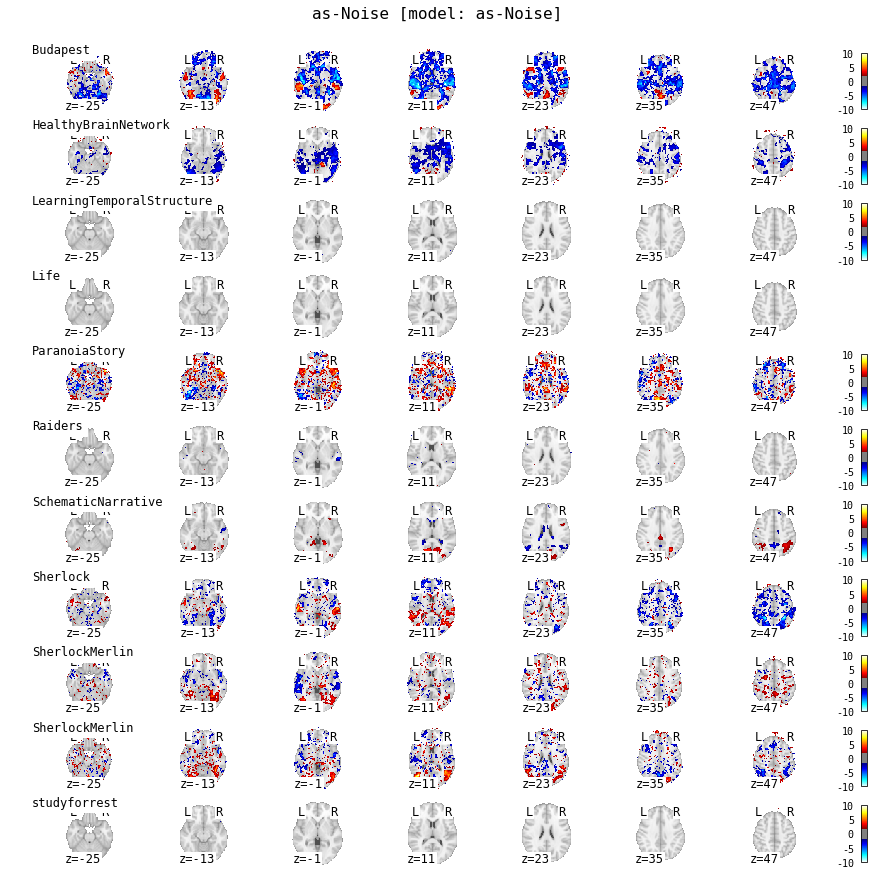

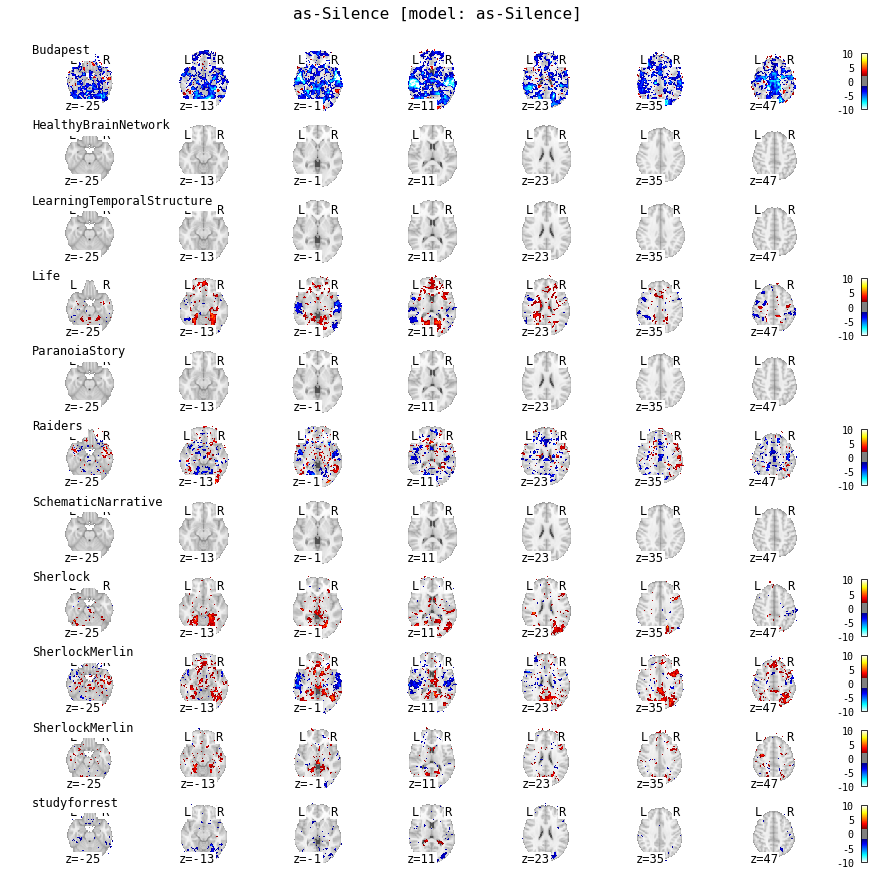

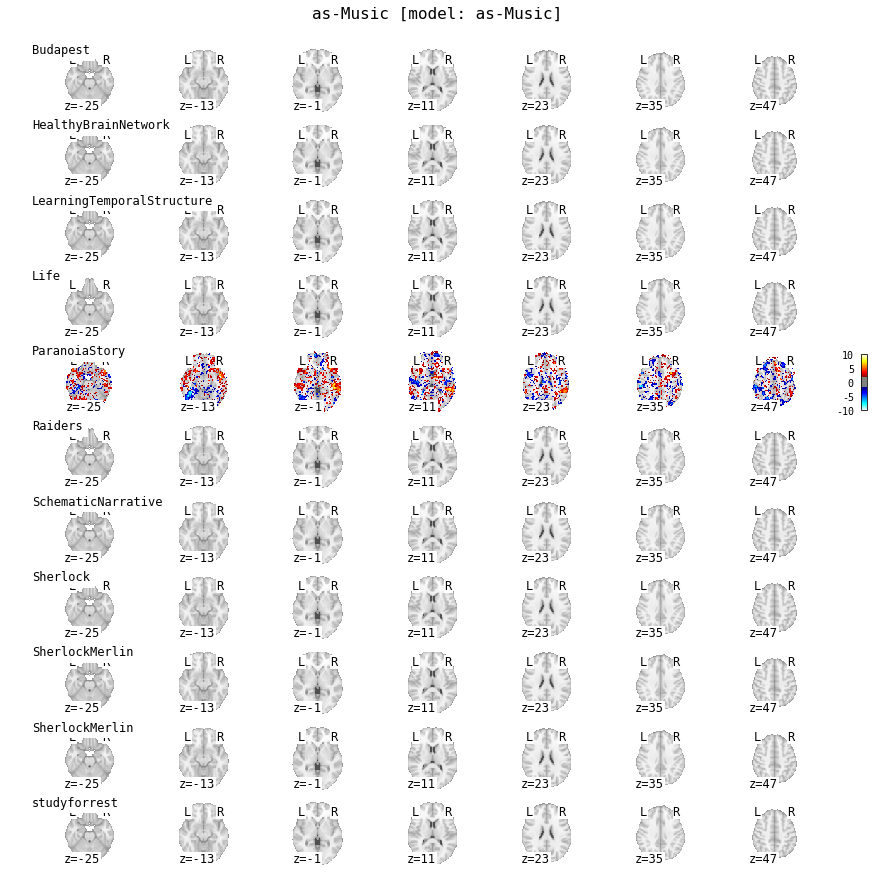

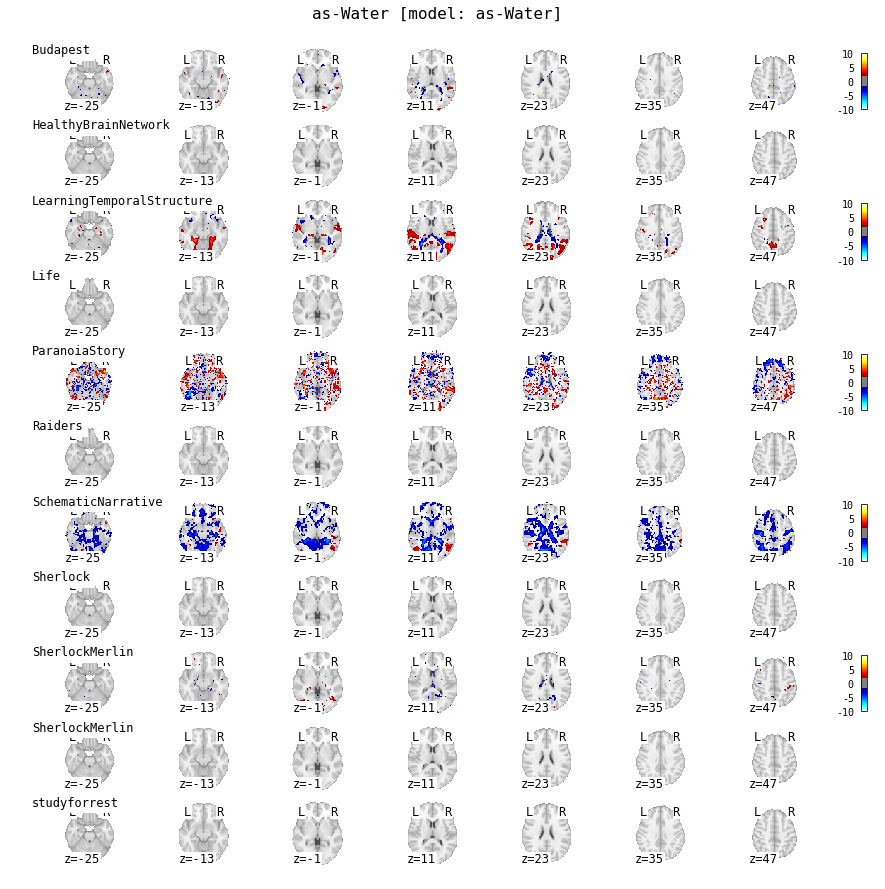

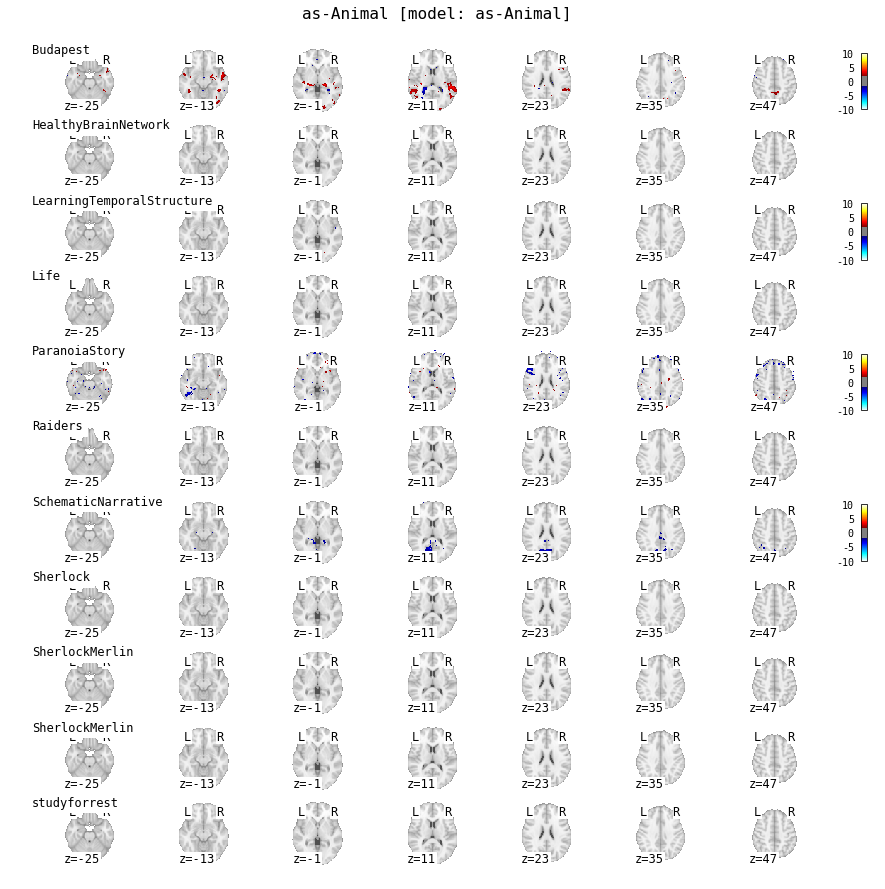

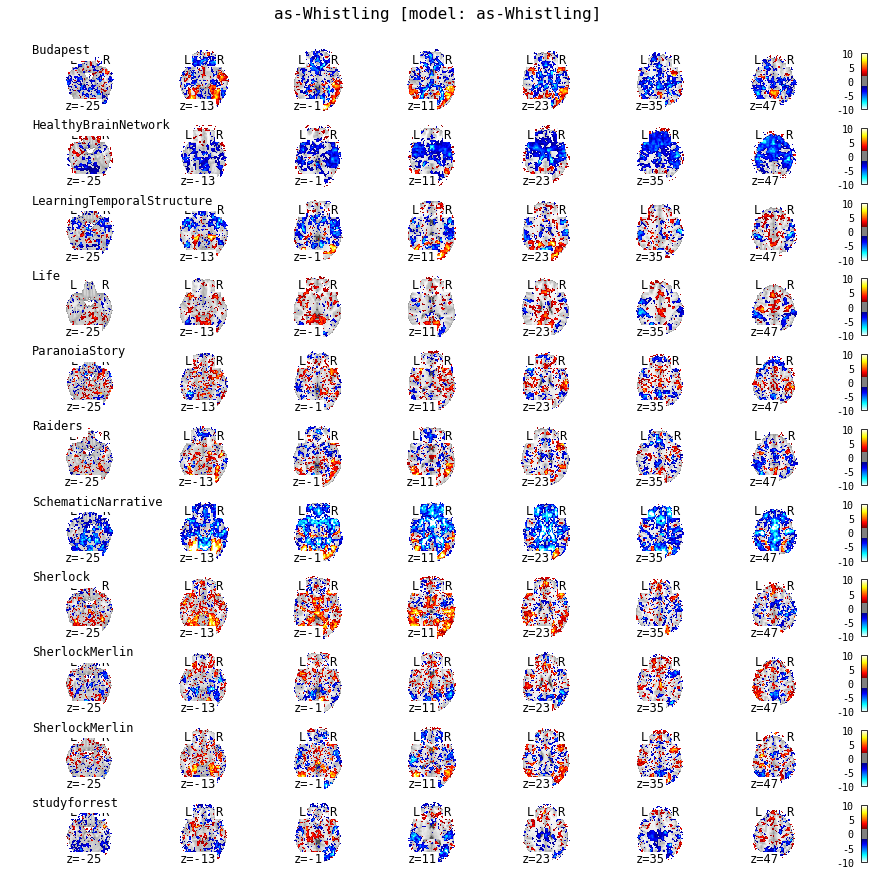

In [ ]:
import warnings; warnings.simplefilter('ignore')
plt.rcParams.update({'font.family': 'monospace'})
plot_contrast_by_analysis(flat_models,
                          contrasts=predictors,
                          vmax=10, draw_cross=True, 
                          figsize=(15,15), colorbar=True, 
                          threshold=1.96)